# BIAS-VARIANCE TRADE-OFF

**Underfitting :** High bias: Model öğrenememiş

**Overfitting :** High vairance: Model genelleme yapamamış, ezber yapmış.

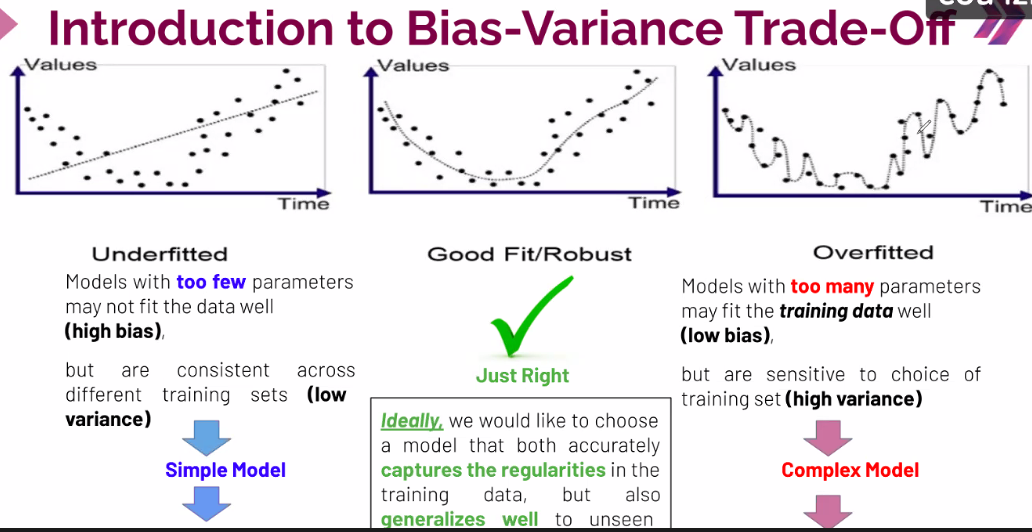

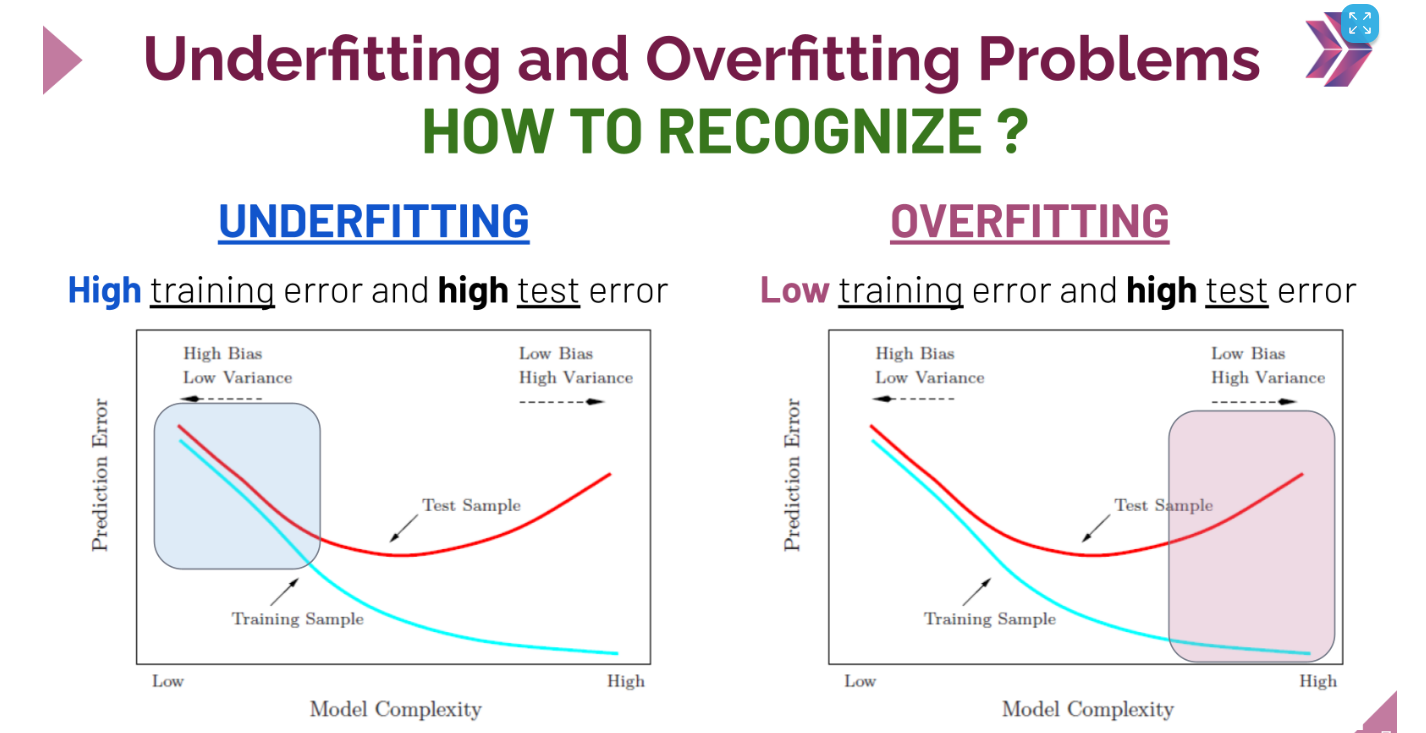

**underfitting :** high training error and high test error

**overfitting :** low training error and high test error

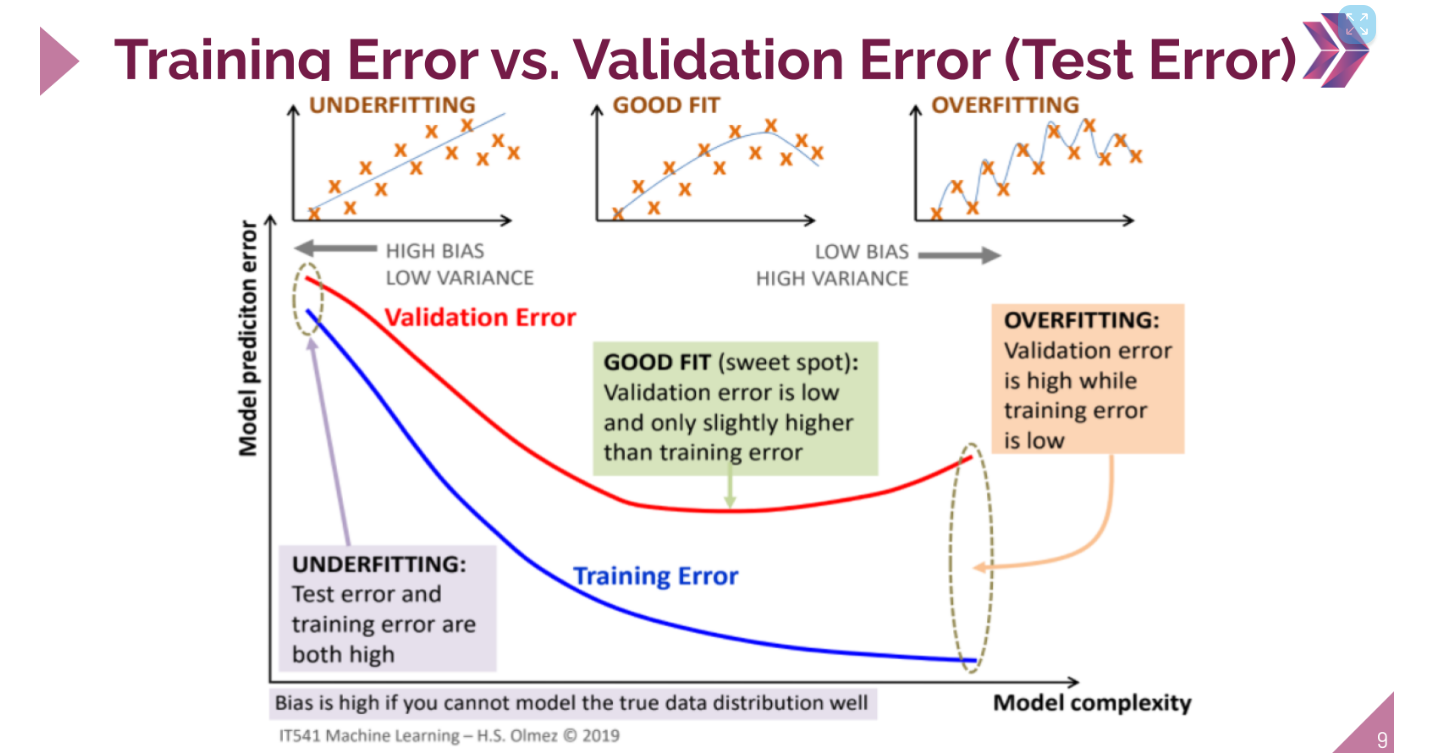

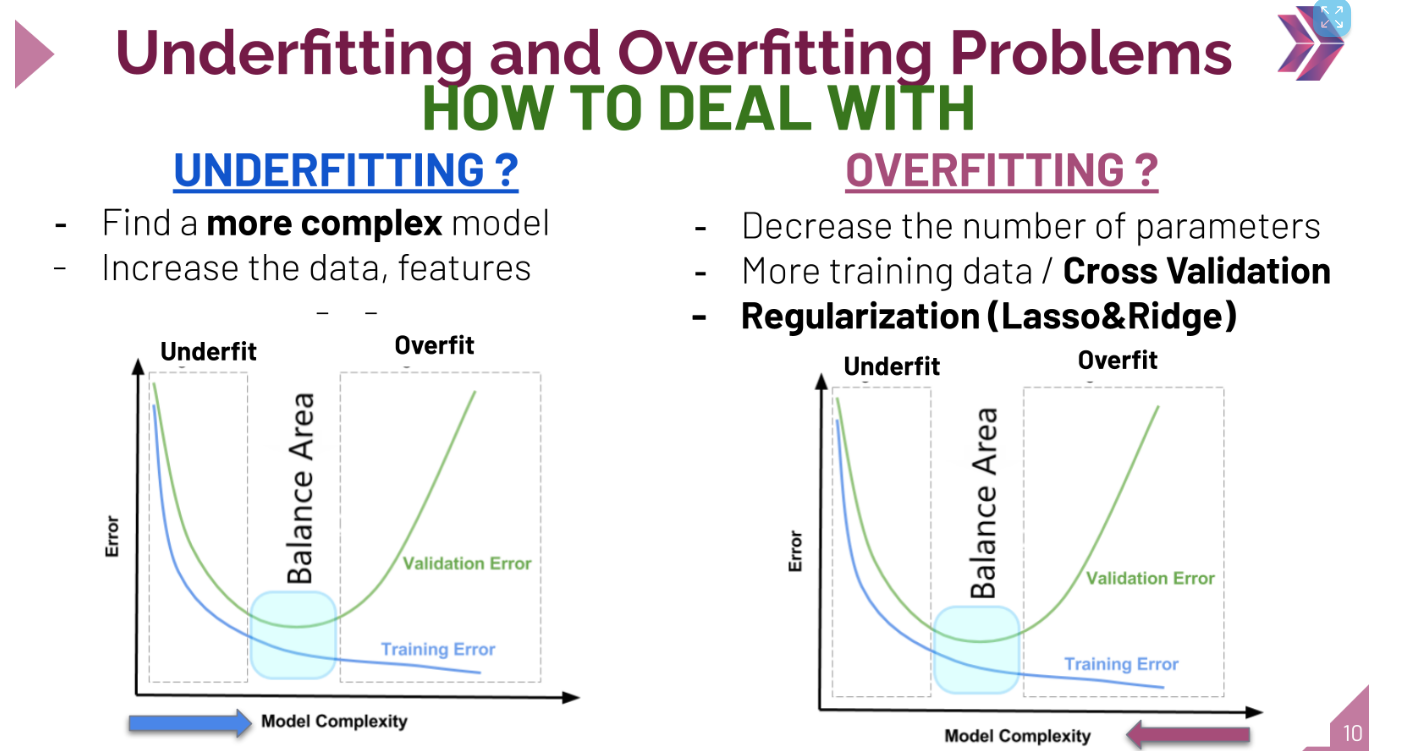

underfitting olması durumunda modelin complexity si düşüktür ya da yeterinde data, feature yoktur.  Bunu aşmak için ya modelin komplesitesini artırırsınız. ya da data, feature eklersiniz.

Overfitting olması durumunda; modelin kompleksitesi çok yüksektir. overfittingi düzeltmek için modelin  kompleksitesini düşürmek gerekir. Yada overfitting probleminin önüne geçmek için cross-validation, grid search ya da regularization (Lasso/Ridge/Elastic-net) yapmak gerekir.

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>Poliynomial Regression-Overfiting-Underfiting</strong></p> 

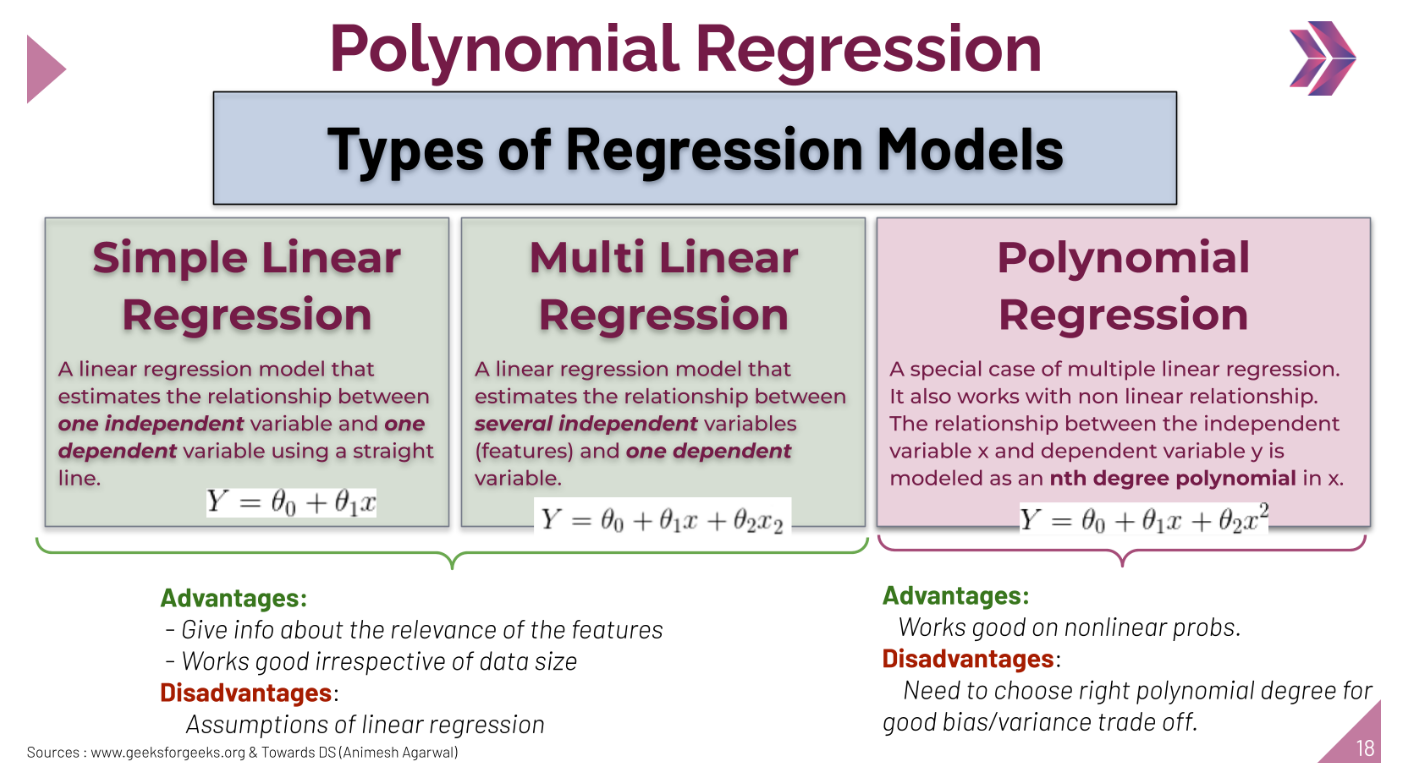

Polynomial Regression is a form of regression analysis in which the relationship 
between the independent variables and dependent variables are modeled in the nth degree polynomial.

Polinom Regresyon , bağımsız değişkenler ile bağımlı değişkenler arasındaki ilişkinin n'inci derece 
polinomda modellendiği bir regresyon analizi şeklidir.

Types of polinomials

1st degree ---> linear    b1x + b0

2nd degree ---> Quadratic b2x**2 + b1x + b0

3rd degree ---> Cubic     b3x**3 + b2x**2 + b1x + b0

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

## Polynomial Features

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._polynomial:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Read more in the :ref:`User Guide <polynomial_features>`.
 |  
 |  Parameters
 |  ----------
 |  degree : int or tuple (min_degree, max_degree), default=2
 |      If a single int is given, it specifies the maximal degree of the
 |      polynomial features. If a tuple `(min_degree, max_degree)` is passed,
 |      then `min_degree` is the minimum and `max_degree` is the maximum
 |

In [5]:
data = np.array([[2, 3, 4]]) 
print(data)

[[2 3 4]]


In [7]:
trans = PolynomialFeatures(degree = 2, include_bias =False)  # intercept olmaması için include_bias=False diyoruz.

In [8]:
trans.fit(data) # 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2

PolynomialFeatures(include_bias=False)

In [10]:
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

In [11]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [13]:
trans.fit_transform(data) # combining method  # fit ve transformu tek seferde yapmak için

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

## Read Dataset

In [14]:
df = pd.read_csv("Advertising.csv")

In [15]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Polynomial Converter

In [16]:
X = df.drop("sales", axis =1)
y = df.sales

In [17]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [18]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [19]:
poly_features = polynomial_converter.transform(X)

In [20]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [21]:
poly_features.shape

(200, 9)

In [22]:
pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [19]:
X.shape

(200, 3)

## Train | Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

In [25]:
X_train.shape

(140, 9)

## Model for fitting

**What is learning? -** optimizing the weights (slope, intercept), generating a 'rule'

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model_poly = LinearRegression()  # modeli oluşturma aşaması, burada boş bir model objekti oluşturulur.

In [30]:
model_poly.fit(X_train, y_train) # modelin eğitilmesi aşaması. Modelin öğrenmesi aşaması.

LinearRegression()

In [31]:
y_pred = model_poly.predict(X_test)

In [32]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


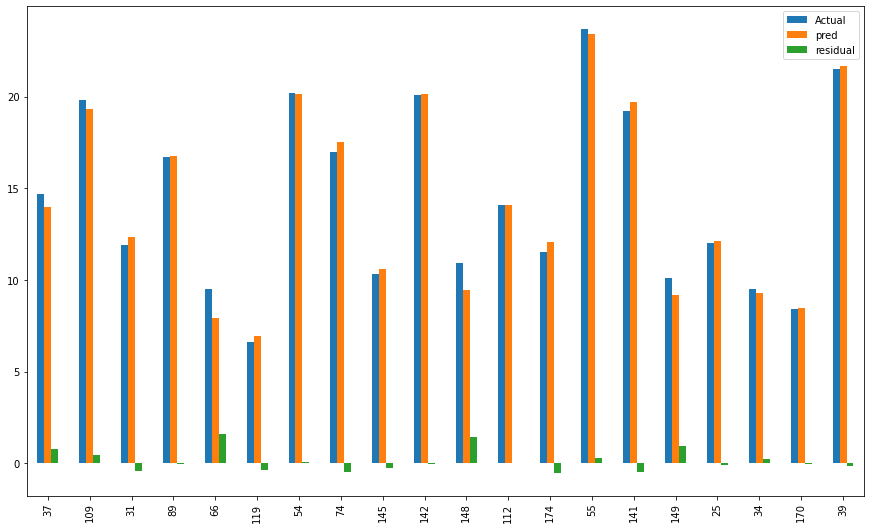

In [33]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

## Poly Coefficients

In [34]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [35]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [36]:
df_coef

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&newspaper,0.000146
Newspaper^2,-0.000030


In [37]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.86190699])

## Evaluation on the Test Set

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [39]:
y_pred = model_poly.predict(X_test)

In [41]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [42]:
eval_metric(y_test, y_pred)

Model performance:
--------------------------
R2_score 	: 0.9843529333146784
MAE 		: 0.4896798044803804
MSE 		: 0.4417505510403708
RMSE 		: 0.664643175726924


In [43]:
y_train_pred = model_poly.predict(X_train)

In [44]:
eval_metric(y_train, y_train_pred)

Model performance:
--------------------------
R2_score 	: 0.9868638137712757
MAE 		: 0.40492481391516405
MSE 		: 0.3456939142443996
RMSE 		: 0.587957408529223


* Simple Linear Regression:
    * MAE      : 1.213
    * RMSE     : 1.516
    * r2_score : 0.8609

* Polynomial 2-degree:
    * MAE      : 0.48
    * RMSE     : 0.66
    * r2_score : 0.9868

## Let's find optimal degree of poly

In [62]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    degrees=[]
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False) # linear reg. da fit_intercept=True yapıldığı için burada gerek yok.
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        degrees.append(i)
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "Degree":degrees}, 
                        index=range(1,d))
        

In [65]:
poly(10)

,train_rmse_errors,test_rmse_errors,Degree
1,1.734594,1.516152,1
2,0.587957,0.664643,2
3,0.433934,0.580329,3
4,0.351708,0.507774,4
5,0.250934,2.575814,5
6,0.208727,4.335319,6
7,5.421578,1379.171610,7
8,0.140900,4129.055366,8
9,0.171543,96107.639851,9


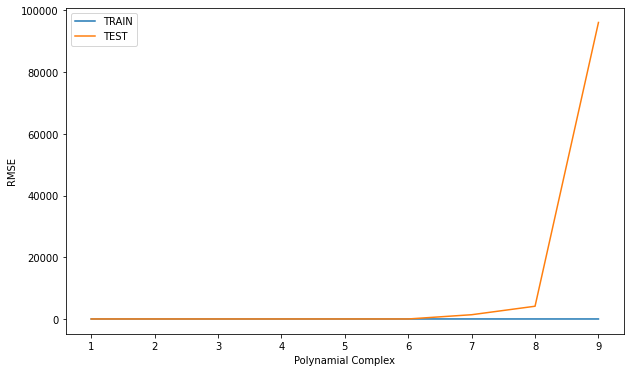

In [46]:
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

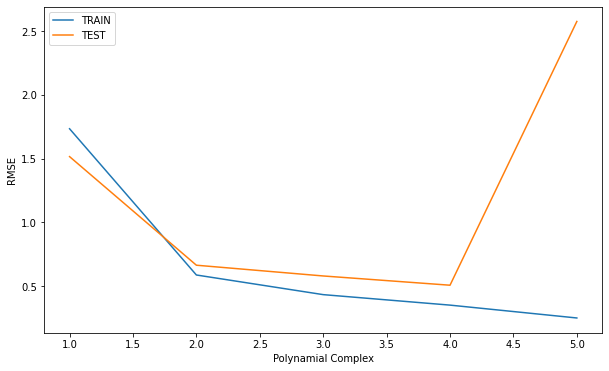

In [47]:
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

## Finalizing Model Choice

In [45]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias=False)

In [46]:
final_model = LinearRegression()

In [47]:
final_model.fit(final_poly_converter.fit_transform(X), y)

LinearRegression()

## Predictions

In [48]:
new_record = [[150, 20, 15]]

In [49]:
new_record_poly = final_poly_converter.fit_transform(new_record)

In [50]:
new_record_poly

array([[1.500e+02, 2.000e+01, 1.500e+01, 2.250e+04, 3.000e+03, 2.250e+03,
        4.000e+02, 3.000e+02, 2.250e+02, 3.375e+06, 4.500e+05, 3.375e+05,
        6.000e+04, 4.500e+04, 3.375e+04, 8.000e+03, 6.000e+03, 4.500e+03,
        3.375e+03]])

In [52]:
final_model.predict(new_record_poly) 

array([14.24950844])

## <span style='color:red'> Overfitting</span> 

In [53]:
over_poly_converter = PolynomialFeatures(degree =5, include_bias =False)

In [54]:
over_model = LinearRegression()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [56]:
over_model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred_over = over_model.predict(X_test)
eval_metric(y_test, y_pred_over)

Model performance:
--------------------------
R2_score 	: 0.7649866087572399
MAE 		: 0.6659621791375513
MSE 		: 6.634936577649166
RMSE 		: 2.5758370634900736


In [58]:
y_train_over = over_model.predict(X_train)
eval_metric(y_train, y_train_over)

Model performance:
--------------------------
R2_score 	: 0.9976072484916693
MAE 		: 0.1862116995144779
MSE 		: 0.06296801981387297
RMSE 		: 0.2509342938178697


train datasının R2 değeri test datasının R2 değerinden yüksek. Bu bize overfiting olduğunu gösterir.
Ayrıca test RMSE değeri train RMSE değerinden yaklaşık 10 kat daha büyük. Ayrıca train RMSE değeri çok düşük.

## <span style='color:red'> Underfitting</span> 

train de de test te de RMSE yüksek olur. İkisin de de RMSE yüksek ise UNDERFITTING olur.

High bias low variance(underfittig)   modelin trainden aldığı scorelar ile testten aldığı scoreların ikisininde  çok düşük olması ile karşımıza çıkar.

low bias high varyans(underfitting) ise model train datası üzerinde çok çok iyi score alırken test datasına gelince kötü scorelar olarak karşımıza çıkar. 